## 針對數值變數

In [2]:
import pandas as pd

# 載入數據
df = pd.read_excel(r'/Users/tangjiahong/Dropbox/Movie/鄭伊廷/台灣國片長片資料.xlsx')

# 查看缺失值比例
+ 高

    + Budget 預算

    + Oscar 奧斯卡

    + Canners 坎城影獎

+ 中間
    
    + GHA 金馬獎

    + TFF 台北電影節

    + TFF_Nom 台北電影節入圍資料

    + No_Weather

+ 無

    + Movie_Lenth

+ 低

    + IMDb    

In [5]:
import pandas as pd

# 假设 df 是您的 DataFrame
variables = [
    'No_Movie_Length', 'No_Budget', 'No_IMDb', 'No_Oscar', 'Class_#N/A',
    'No_Cannes', 'No_GHA', 'No_TFF', 'TFF_NomData', 'No_Weather', 'Subsidy_Yes'
]

# 创建一个字典来存储结果
proportions = {}

for var in variables:
    # 计算每个变量中值为1的比例
    proportions[var] = {
        'Proportion of 1s': df[var].mean(),  # 由于1和0，mean将给出1的比例
        'Proportion of 0s': 1 - df[var].mean()  # 0的比例是1减去1的比例
    }

# 转换字典为DataFrame以便更好的显示
proportions_df = pd.DataFrame(proportions).T  # 转置以变量名为行

# 显示结果
print(proportions_df)


                 Proportion of 1s  Proportion of 0s
No_Movie_Length          0.000000          1.000000
No_Budget                0.884834          0.115166
No_IMDb                  0.077851          0.922149
No_Oscar                 0.997898          0.002102
Class_#N/A               0.000445          0.999555
No_Cannes                0.996511          0.003489
No_GHA                   0.474283          0.525717
No_TFF                   0.536723          0.463277
TFF_NomData              0.363482          0.636518
No_Weather               0.402535          0.597465
Subsidy_Yes              0.348030          0.651970


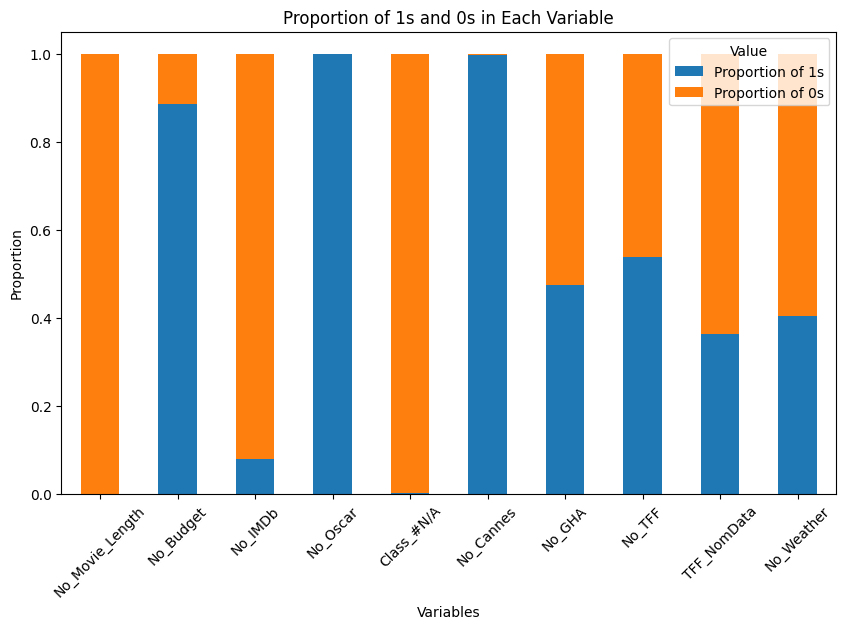

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制条形图
proportions_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of 1s and 0s in Each Variable')
plt.xlabel('Variables')
plt.ylabel('Proportion')
plt.legend(title='Value')
plt.xticks(rotation=45)
plt.show()


# 分組比較對票房影響

In [19]:
# 分组比较
grouped = df1.groupby('No_Weather')
average_stats = grouped[['Audience']].mean()

# 打印结果
print(average_stats)


             Audience
No_Weather           
0           95.247864
1           64.180014


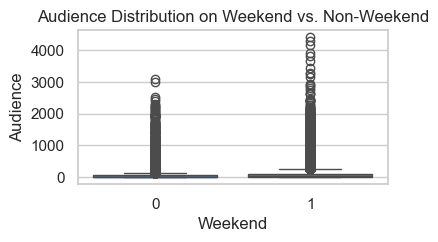

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图形的风格
sns.set(style="whitegrid")

# 绘制周末与非周末的观众数分布
plt.figure(figsize=(4, 2))
sns.boxplot(x='Weekend', y='Audience', data=df1)
plt.title('Audience Distribution on Weekend vs. Non-Weekend')
plt.show()


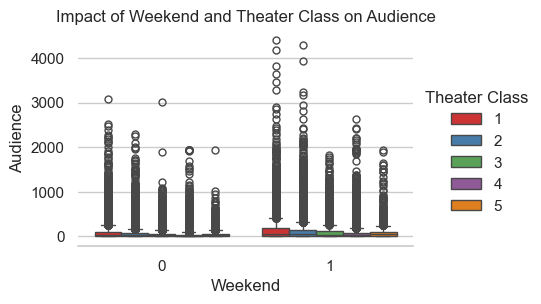

In [29]:
# 使用catplot显示多个分组变量的影响
g = sns.catplot(x="Weekend", y="Audience", hue="Theater_Class", kind="box", data=df1, height=3, aspect=1.5, palette="Set1")
g.despine(left=True)
g.set_axis_labels("Weekend", "Audience")
g.legend.set_title("Theater Class")
plt.title('Impact of Weekend and Theater Class on Audience')
plt.show()


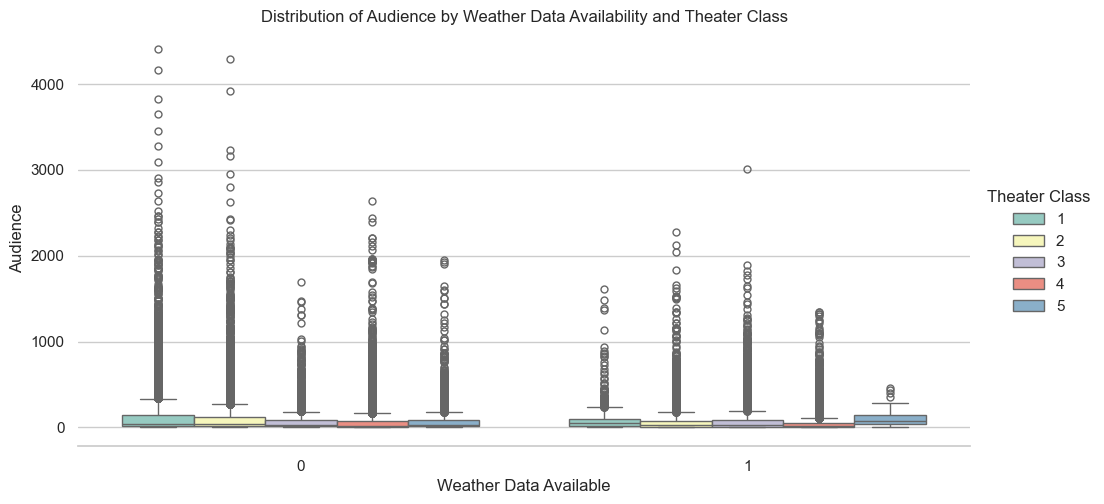

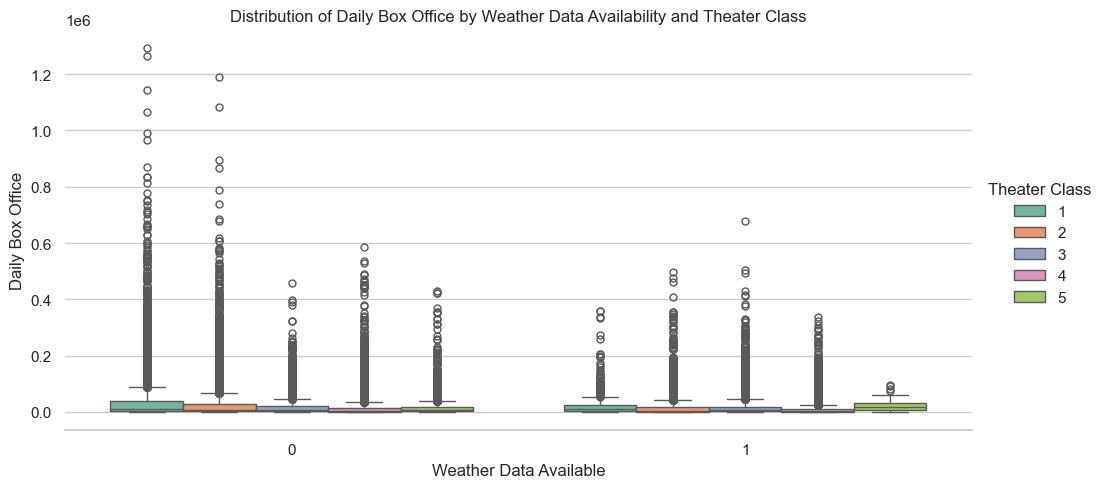

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图形的风格
sns.set(style="whitegrid")

# 创建一个箱形图，展示 'Audience' 在 'No_Weather' 和 'Theater_Class' 分组下的分布
g = sns.catplot(x="No_Weather", y="Audience", hue="Theater_Class", kind="box", data=df1, height=5, aspect=2, palette="Set3")
g.despine(left=True)  # 移除图的左边框
g.set_axis_labels("Weather Data Available", "Audience")  # 设置坐标轴标签
g.legend.set_title("Theater Class")  # 设置图例标题
plt.title('Distribution of Audience by Weather Data Availability and Theater Class')  # 设置图的标题
plt.show()

# 对 'Daily_box_office' 进行同样的可视化
g = sns.catplot(x="No_Weather", y="Daily_box_office", hue="Theater_Class", kind="box", data=df1, height=5, aspect=2, palette="Set2")
g.despine(left=True)
g.set_axis_labels("Weather Data Available", "Daily Box Office")
g.legend.set_title("Theater Class")
plt.title('Distribution of Daily Box Office by Weather Data Availability and Theater Class')
plt.show()


# 歸類變數

In [12]:
num_1 = [
    'Audience', 'Tempture', 'Rainfall', 'Budget',
    'Movie_Length', 'IMDb_rating', 'Director_Award', 
    'Actor_Awardall', 'Subsidy_Amount', 'Oscar_AwardTotal', 
    'Cannes_AwardTotal', 'TFF_Nom', 'TFF_AwardTotal'
]



# Daily_box_office
# Budget

In [13]:
df2 = df1[num_1].copy()

In [14]:
print(df2.head())  # 查看前几行数据
print(df2.info())  # 获取 DataFrame 的基本信息


   Audience  Tempture  Rainfall  Movie_Length  IMDb_rating  Director_Award  \
0        79       0.0       0.0           103          5.3               0   
1        50       0.0       0.0           103          5.3               0   
2        44      22.1       0.0           103          5.3               0   
3         4      22.7       0.0           103          5.3               0   
4        32       0.0       0.0           108          6.9               0   

   Actor_Awardall  Subsidy_Amount  Oscar_AwardTotal  Cannes_AwardTotal  \
0               0             500                 0                  0   
1               0             500                 0                  0   
2               0             500                 0                  0   
3               0             500                 0                  0   
4               0               0                 0                  0   

   TFF_Nom  TFF_AwardTotal  
0        0               0  
1        0               0  

# 描述性統計

In [15]:
# 获取描述性统计信息
descriptive_stats = df2.describe()
print(descriptive_stats)


           Audience      Tempture      Rainfall  Movie_Length   IMDb_rating  \
count  74232.000000  74232.000000  74232.000000  74232.000000  74232.000000   
mean      82.741958     13.881800      3.396756    108.624273      5.851129   
std      175.138780     12.087158     13.374486     15.284790      1.926832   
min        0.000000      0.000000      0.000000     60.000000      0.000000   
25%        9.000000      0.000000      0.000000    100.000000      5.600000   
50%       27.000000     17.600000      0.000000    108.000000      6.400000   
75%       82.000000     24.400000      0.500000    118.000000      7.100000   
max     4406.000000     33.200000    321.500000    237.000000      9.200000   

       Director_Award  Actor_Awardall  Subsidy_Amount  Oscar_AwardTotal  \
count    74232.000000    74232.000000    74232.000000      74232.000000   
mean         0.259618        0.012097      383.645059          0.008406   
std          0.785837        0.109321      574.017606          

In [16]:
# 计算偏度
skewness = df2.skew()
print("Skewness:\n", skewness)

# 计算峰度
kurtosis = df2.kurtosis()
print("Kurtosis:\n", kurtosis)


Skewness:
 Audience              6.569158
Tempture             -0.080723
Rainfall              8.955737
Movie_Length          1.874563
IMDb_rating          -2.093776
Director_Award        4.819841
Actor_Awardall        8.926319
Subsidy_Amount        1.135200
Oscar_AwardTotal     21.745514
Cannes_AwardTotal    16.907262
TFF_Nom               1.640126
TFF_AwardTotal        1.938415
dtype: float64
Kurtosis:
 Audience              71.859351
Tempture              -1.661265
Rainfall             124.842189
Movie_Length          12.400910
IMDb_rating            3.833003
Director_Award        35.021392
Actor_Awardall        77.681256
Subsidy_Amount        -0.118337
Oscar_AwardTotal     470.880057
Cannes_AwardTotal    283.863142
TFF_Nom                1.470716
TFF_AwardTotal         2.713837
dtype: float64


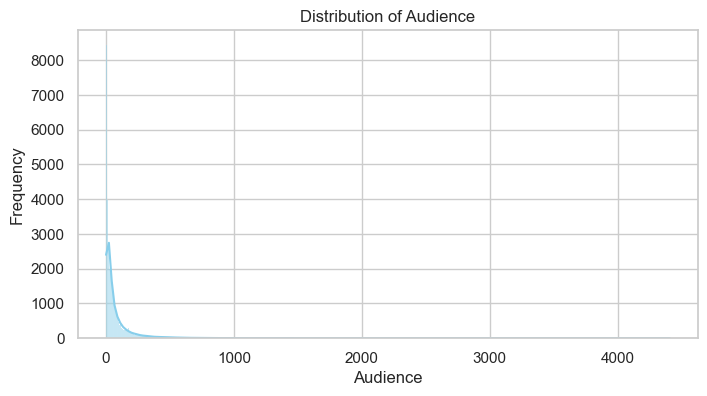

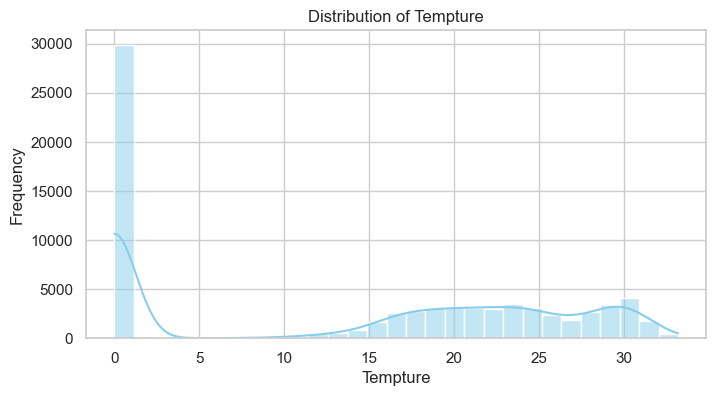

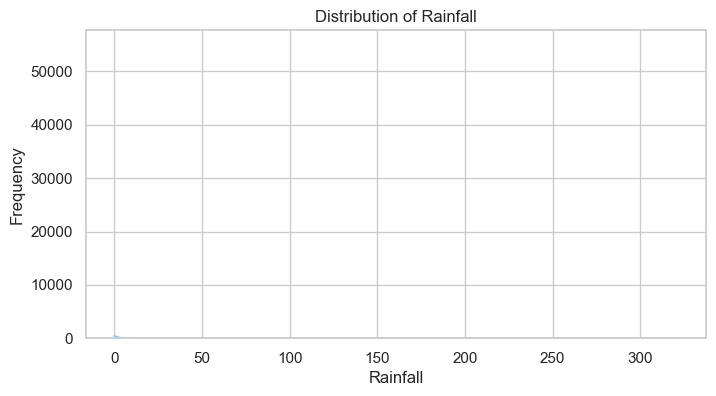

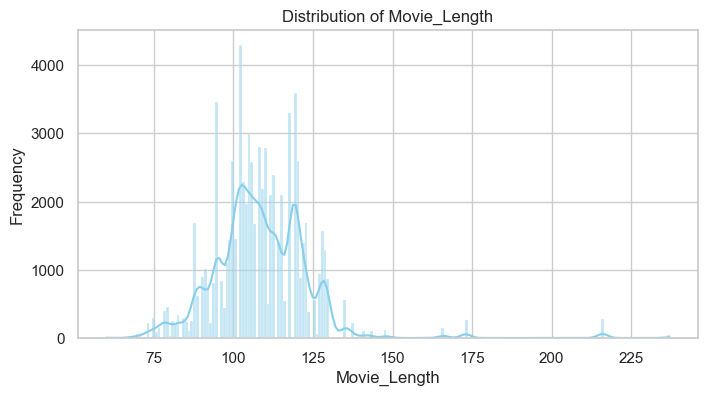

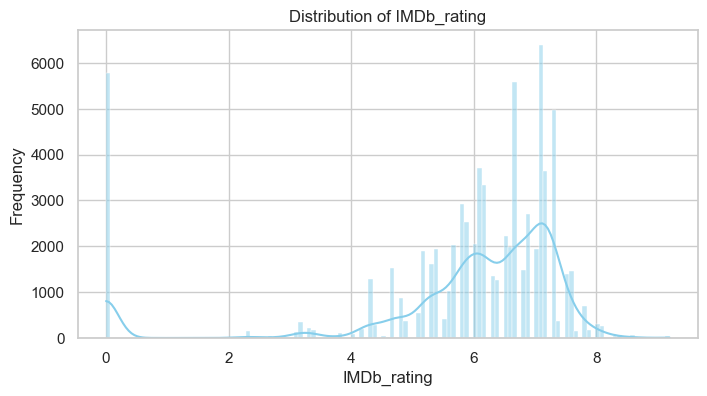

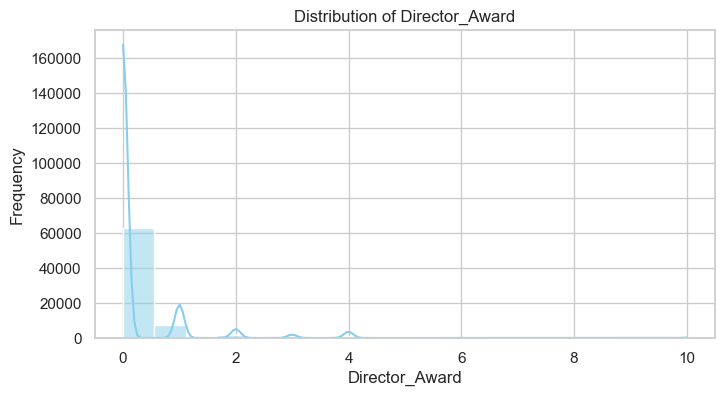

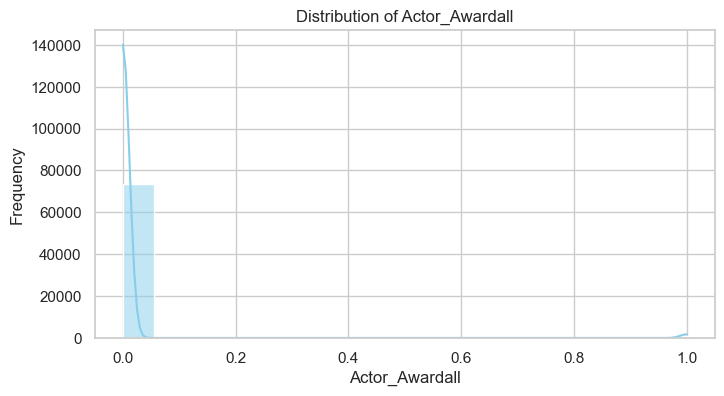

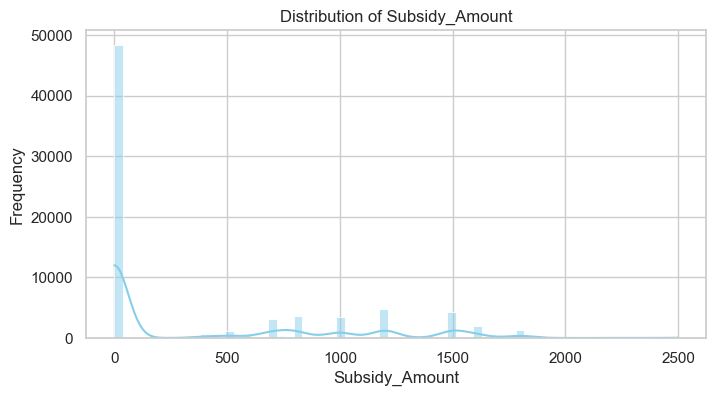

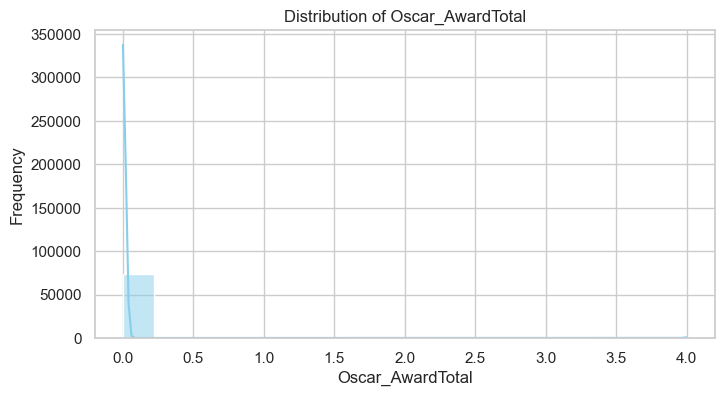

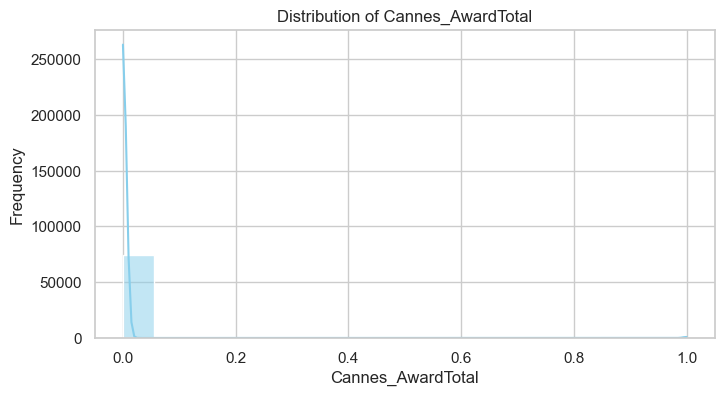

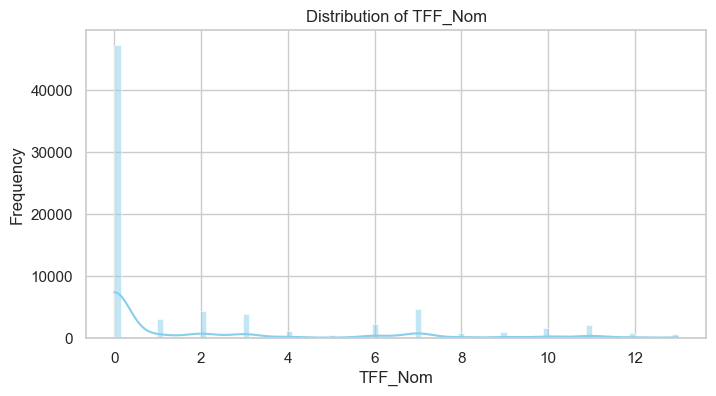

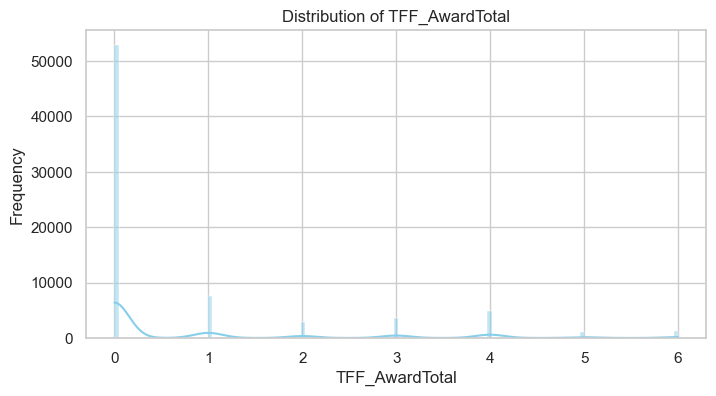

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置美观的图形样式
sns.set(style="whitegrid")

# 绘制每个数值变量的直方图
for column in df2.columns:
    plt.figure(figsize=(8, 4))  # 设置图形大小
    sns.histplot(df2[column], kde=True, color="skyblue")  # 使用核密度估计增强直方图
    plt.title(f'Distribution of {column}')  # 设置标题
    plt.xlabel(column)  # 设置横坐标标签
    plt.ylabel('Frequency')  # 设置纵坐标标签
    plt.show()


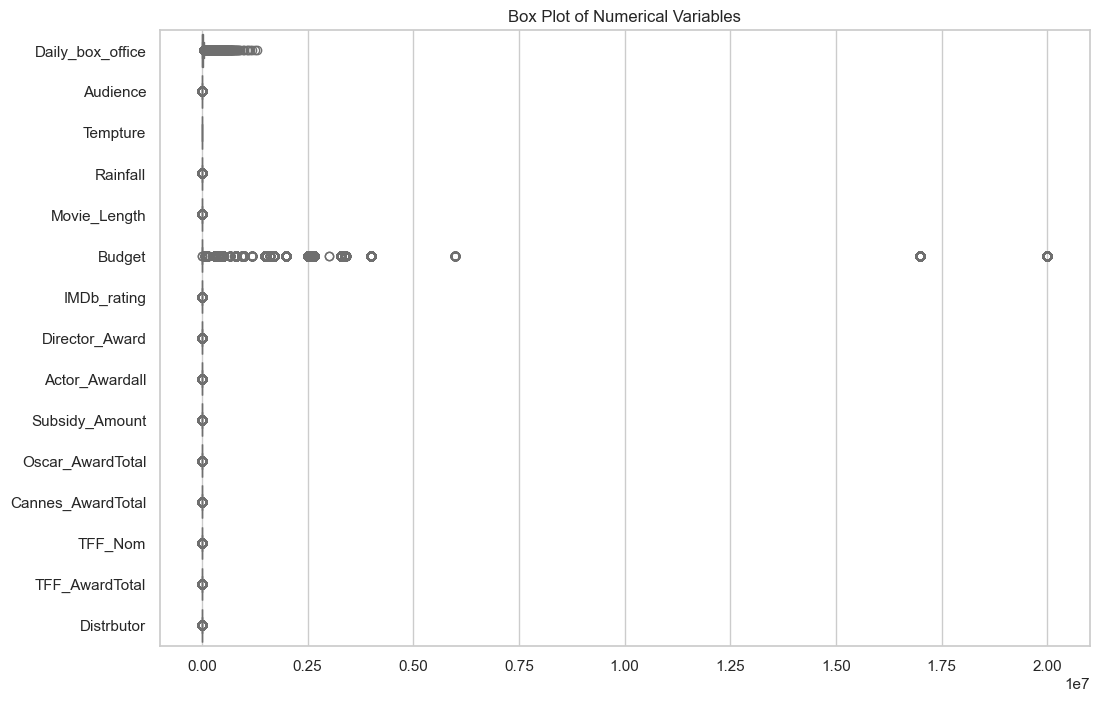

In [9]:
# 绘制所有数值变量的箱形图
plt.figure(figsize=(12, 8))  # 设置图形大小
sns.boxplot(data=df2, orient="h", palette="pastel")  # 水平方向画箱形图
plt.title('Box Plot of Numerical Variables')  # 设置标题
plt.show()


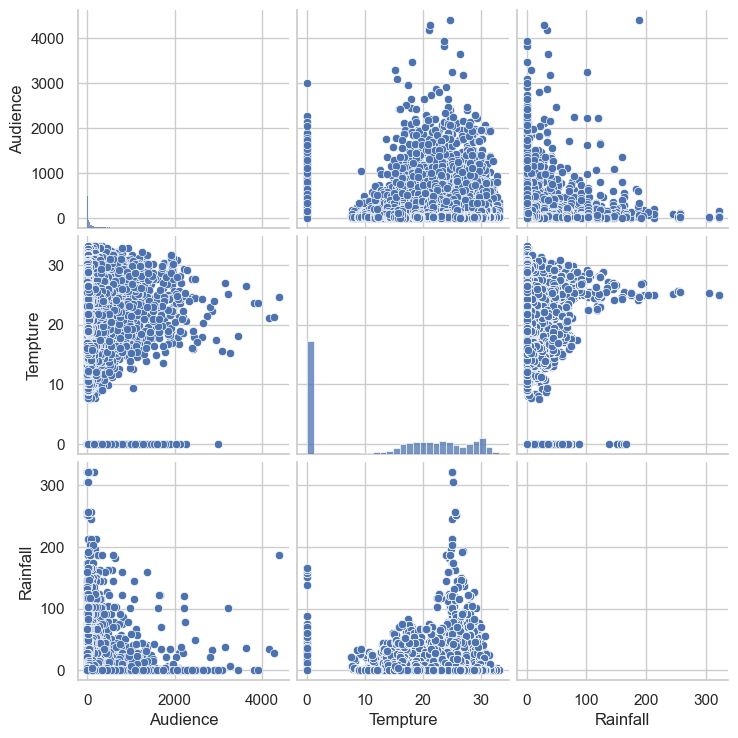

In [11]:
# 选择部分变量进行 pairplot 可视化，避免图太大不易阅读
selected_columns = ['Audience', 'Tempture', 'Rainfall']
sns.pairplot(df2[selected_columns])
plt.show()
